In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib notebook


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidprime(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [2]:
# inputs:
input_pairs = np.array([[0,0],[0,1],[1,0],[1,1]])
# labels:
and_gate = np.array([0,0,0,1])
or_gate = np.array([0,1,1,1])
nand_gate = np.array([1,1,1,0])
nor_gate = np.array([1,0,0,0])
xor_gate = np.array([0,1,1,0])


In [3]:
class Perceptron:
    def __init__(self, input_units):
        self.weights = np.random.rand(input_units)
        self.bias = np.random.randn()
        self.alpha = 1
        
        self.inputs = 0
        self.d = 0
        
    def forward_step(self, inputs):
        # calculate activation of the neuron
        self.d = self.weights @ inputs + self.bias
        #update inputs
        self.inputs = inputs
        
        return sigmoid(self.d)
    
    def update(self, delta):
        # compute gradients
        gradiant_w = self.inputs * delta
        
        self.bias = delta
    
        self.bias -= self.alpha * delta
        self.weights -= self.alpha * gradiant_w
            



In [4]:
class MLP:
    
    def __init__(self):
        # store output
        self.output = 0
        #create hidden layer
        self.layer = []
        for i in range(4):
            self.layer.append(Perceptron(2))
        self.output_neuron = Perceptron(4)
    
    def train_epoch(self):
        data = next(generate_data("and"))
        self.inputs = data[:2]
        self.target = data[2]
        print("target: ", self.target)
        self.backprop_step()
        
        
        
    def forward_step(self, inputs):
        #store inputs
        next_inputs = np.zeros(4)
        
        for index, perceptron in enumerate(self.layer):
            next_inputs[index] = perceptron.forward_step(inputs)
        
        self.output = self.output_neuron.forward_step(next_inputs)
    
    def backprop_step(self, inputs, target):
        #calculate the delta for previous layer
        delta = -(target-self.output)*sigmoidprime(self.output_neuron.d)
        
        self.output_neuron.update(delta)
        
        
        # calculate delta of the Layer (L-1) with
        perceptron_count = 0
        for index, perceptron in enumerate(self.layer):
            delta_perceptron = delta* self.output_neuron.weights[index] * sigmoidprime(perceptron.d)
           
            #update that perceptron
            perceptron.update(delta_perceptron)
    
    

In [5]:
mlp = MLP()

accuracies = []
loss =[]
epochs = []
loss_average = [] 

# choose the logic gate we want to train for
gate = xor_gate

#train the network for 1000 epochs
for epoch in range (1000):
    
    error = 0
    accuracy_sum = 0

    #in each epoch, loop through all datapoints once
    for index, datapoint in enumerate(input_pairs):
        
        mlp.forward_step(datapoint)
        
        mlp.backprop_step(datapoint, gate[index])  
        error += (gate[index]-mlp.output)**2
        
                
        output = -1
        # if the output of the mlp is above 0.5, we set it to 1
        if(mlp.output>=0.5):
            output = 1
        # else set it to 0.
        else:
            output = 0
        
        # if output equals target function, we solved it -> accuracy +1
        if(output==gate[index]):
            accuracy_sum+=1
        
   
    # list epoch number
    epochs.append(epoch)
    # list how many targets and output were the same
    accuracies.append(accuracy_sum/input_pairs.shape[0])
    # list error
    loss.append(error)
    loss_average.append(error/input_pairs.shape[0])
   



<IPython.core.display.Javascript object>


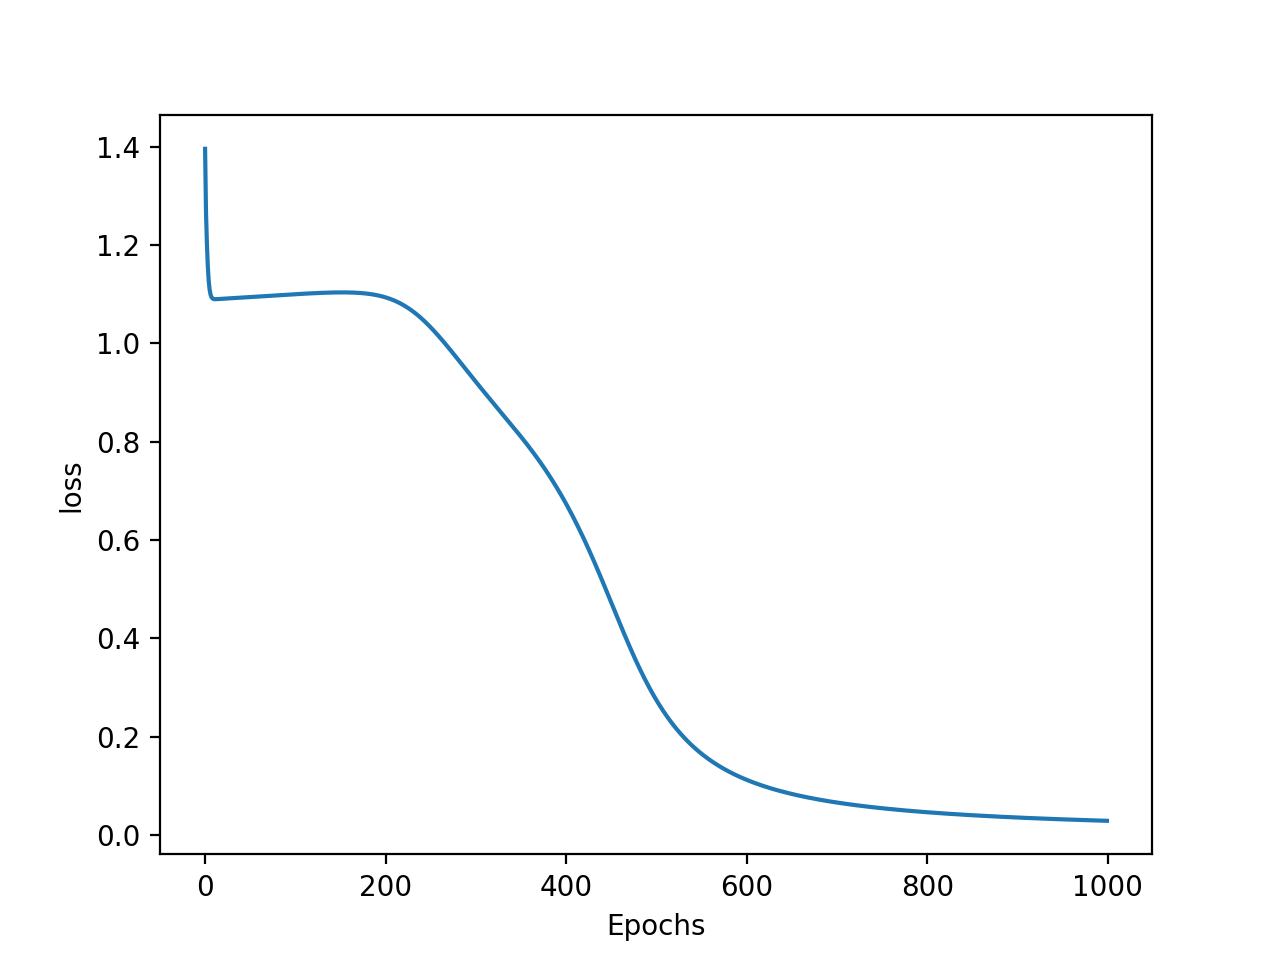

<IPython.core.display.Javascript object>


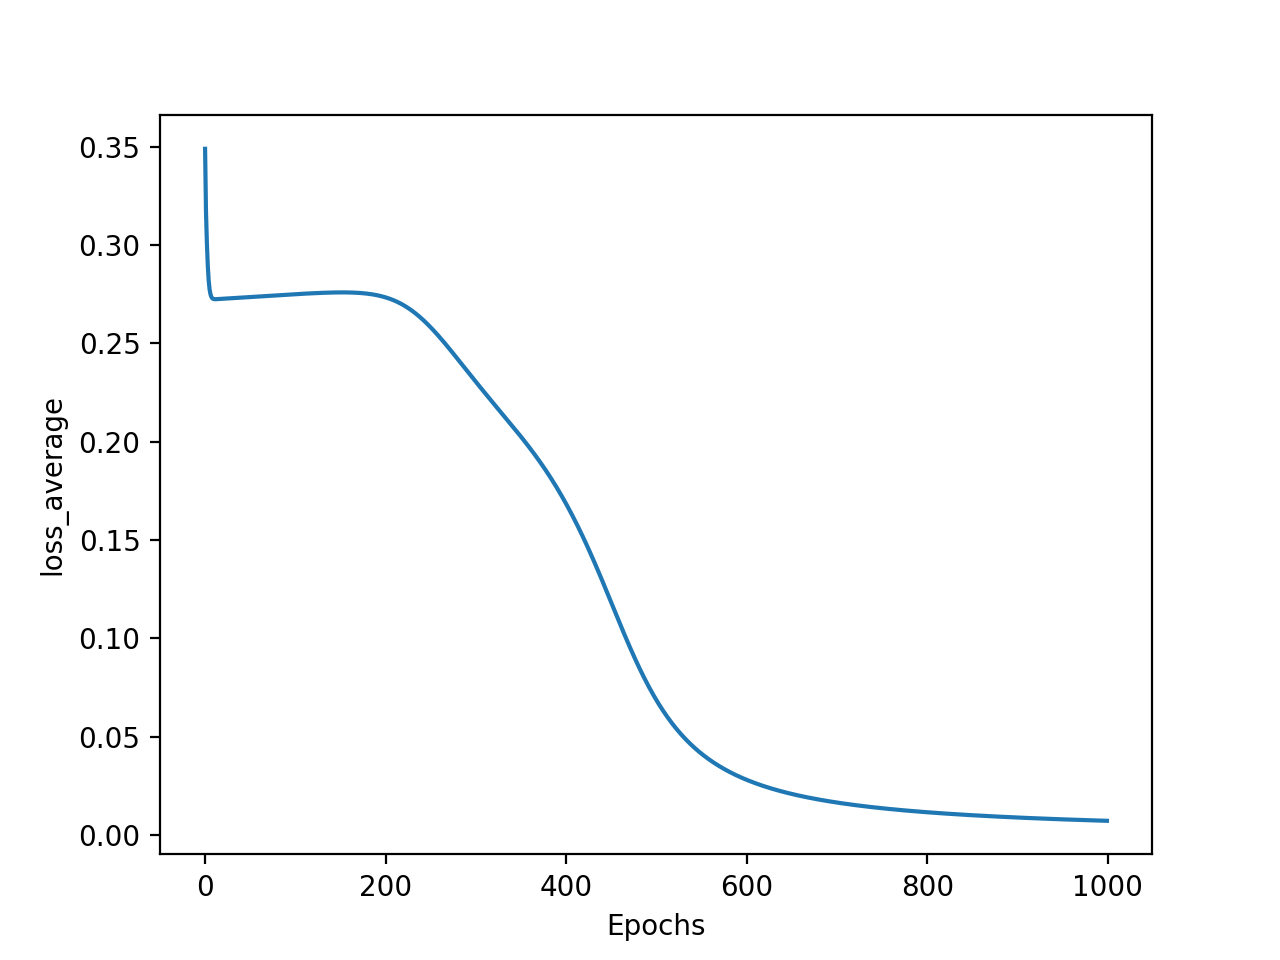

<IPython.core.display.Javascript object>


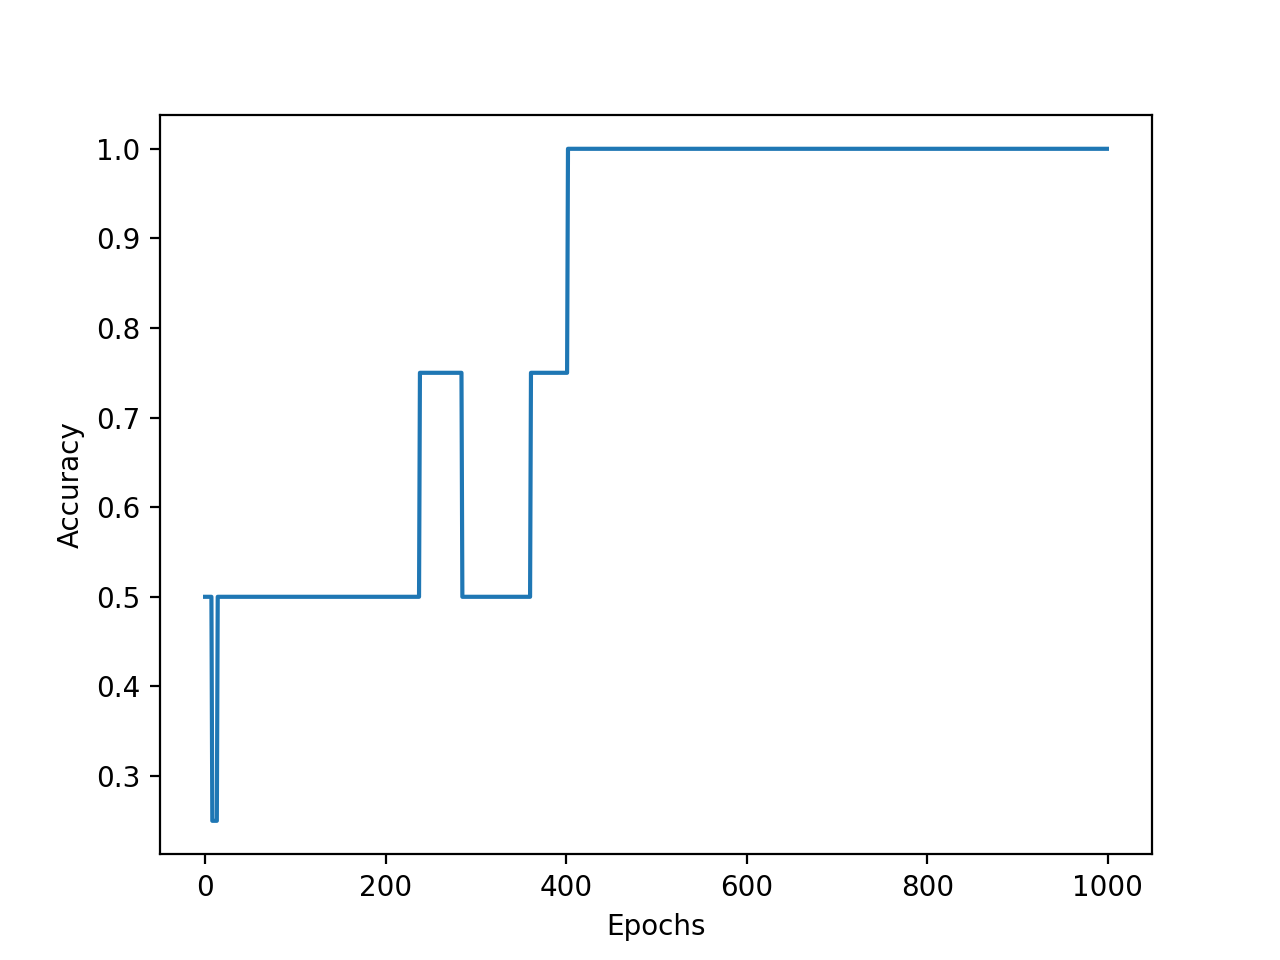

In [6]:
# plot epochs (x) and loss(y)
plt.figure()
plt.plot(epochs, loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

# plot epochs (x) and loss_average(y)
plt.figure()
plt.plot(epochs, loss_average)
plt.xlabel("Epochs")
plt.ylabel("loss_average")
plt.show()

#plot epochs(x) and accuracy(y)
plt.figure()
plt.plot(epochs, accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()